# Testing Models

## (4) Decision Tree - tree diag 

In [ ]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset - new data set after feature extraction
train = pd.read_csv("new_feauturesExtracted_dataset.csv")
train = train.drop('UserAvgScore', axis=1)

train.head(10)


FileNotFoundError: ignored

In [ ]:
# we have to split this data into train and test
# We create a new column called `train` which is `True` if the instance should be included in the training by using the numpy random number generator.

train['train'] = np.random.rand(len(train)) < 0.8

df_train = train[train.train == True]
df_test = train[train.train == False]

print(df_train.shape, df_test.shape)

(111847, 21) (27837, 21)


In [ ]:
train.columns

Index(['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'neg', 'neu', 'pos', 'compound', 'Helpfulness', 'UnHelpfulness',
       'UserAvgScore', 'NumUppercase_T', 'NumUppercase_S', 'ReviewLength',
       'SummaryLength', 'Month', 'Year', 'numExclamation_S',
       'numExclamation_T', 'train'],
      dtype='object')

In [ ]:
predictors = [ 'neg', 'pos', 'compound', 'Helpfulness', 'UnHelpfulness',
       'UserAvgScore', 'NumUppercase_T', 'NumUppercase_S', 'ReviewLength',
       'SummaryLength', 'Month', 'numExclamation_S',
       'numExclamation_T']
X1_train = df_train[predictors]
X1_test = df_test[predictors]
y_train = df_train['Score']
y_test = df_test['Score']

In [ ]:
# The dataset is quite large and, depending on the method, training may be pretty slow. Let's sample 5000 instances from the training set to use to speed up training

train_sample_size = 5000

df_train = X1_train.copy()
df_train["Score"] = y_train 

# Randomly sample 5000 rows from the training data
df_train_sample = df_train.sample(n=train_sample_size, random_state=5) 

In [ ]:
X_train_sample = df_train_sample[predictors]
y_train_sample = df_train_sample["Score"][:, np.newaxis]
y_train_sample.shape

/var/folders/28/k_0b83n90054zf3kf809sw6m0000gp/T/ipykernel_60223/2741424500.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_sample = df_train_sample["Score"][:, np.newaxis]


(5000, 1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train_sample, y_train_sample)

DecisionTreeRegressor()

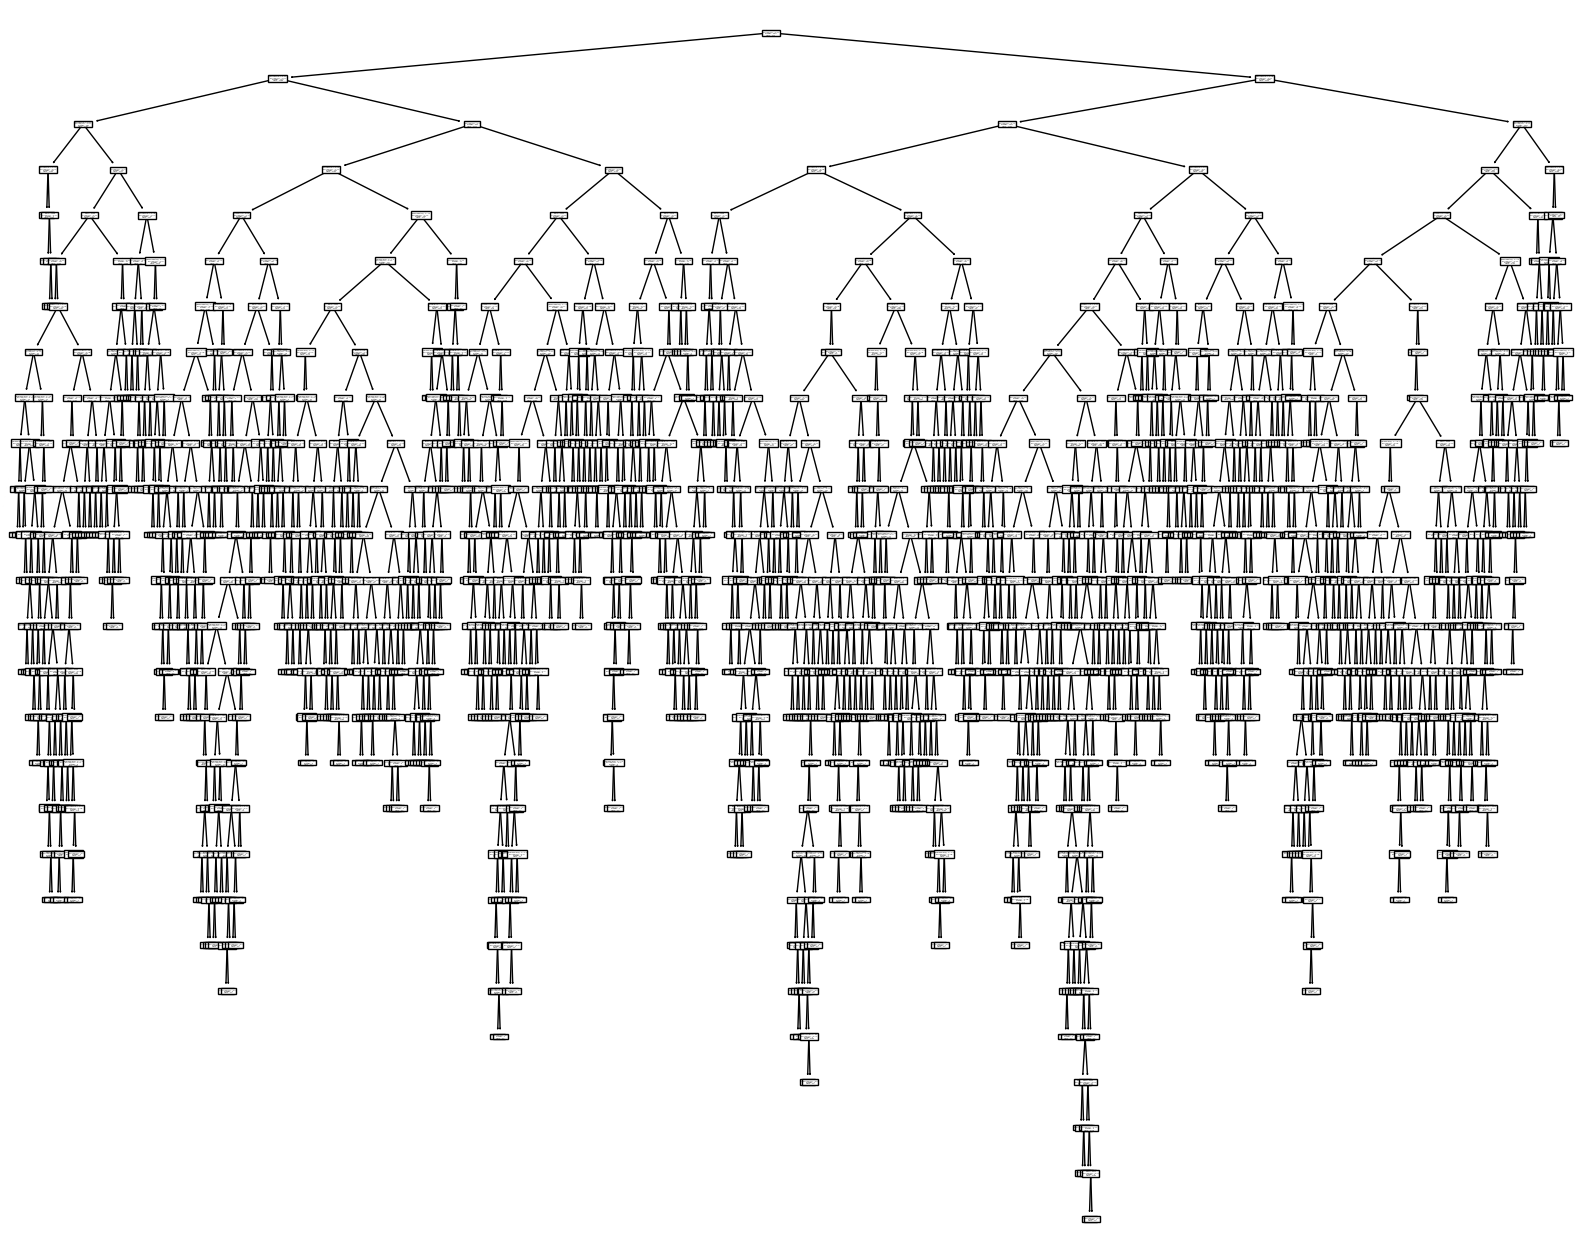

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(20,16))
tree.plot_tree(dt, feature_names=predictors);